In [32]:
# importarea modulului Python Image Library (PIL) și a modulului Tkinter
from PIL import Image, ImageTk
import tkinter as tk

# deschiderea unei imagini cu ajutorul modulului PIL
image = Image.open('robotica.jpg')

# creearea ferestrei principale cu ajutorul modulului Tkinter
root = tk.Tk()

# convertirea imaginii într-un format potrivit pentru afișare cu ajutorul modulului ImageTk
image_tk = ImageTk.PhotoImage(image)

# creearea etichetei pentru a afișa imaginea
label = tk.Label(root, image=image_tk)
label.pack()

# funcția care va fi apelată atunci când se face clic pe imagine
def click_handler(event):
    # afișarea coordonatelor cursorului
    print(f'Cursorul se află la coordonatele: {event.x}, {event.y}')

# atașarea evenimentului de clic pe imagine
label.bind('<Button-1>', click_handler)

# afișarea ferestrei principale
root.mainloop()


Cursorul se află la coordonatele: 112, 380
Cursorul se află la coordonatele: 198, 390
Cursorul se află la coordonatele: 153, 485
Cursorul se află la coordonatele: 264, 513
Cursorul se află la coordonatele: 369, 440
Cursorul se află la coordonatele: 444, 408
Cursorul se află la coordonatele: 487, 477
Cursorul se află la coordonatele: 434, 604
Cursorul se află la coordonatele: 245, 757


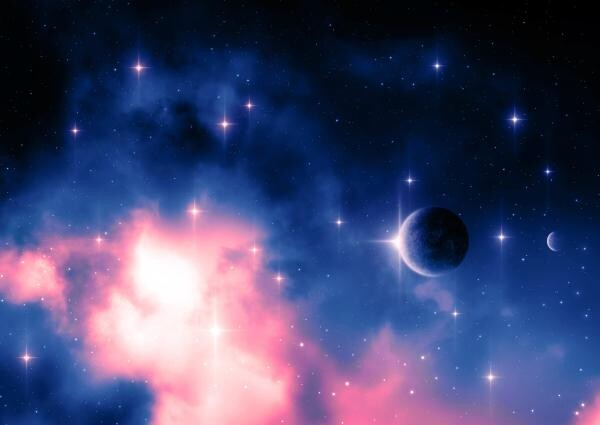

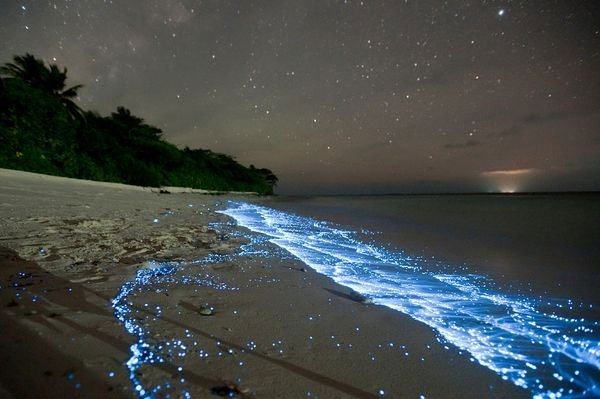

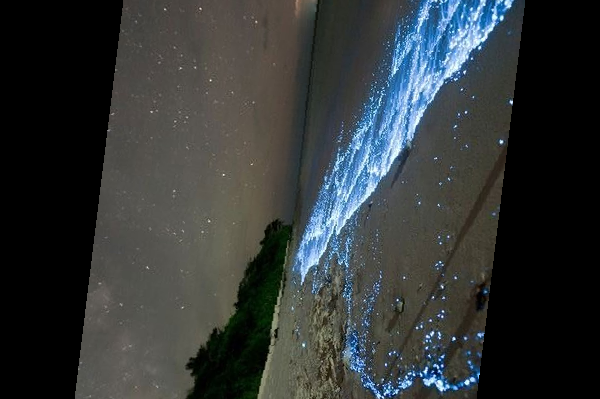

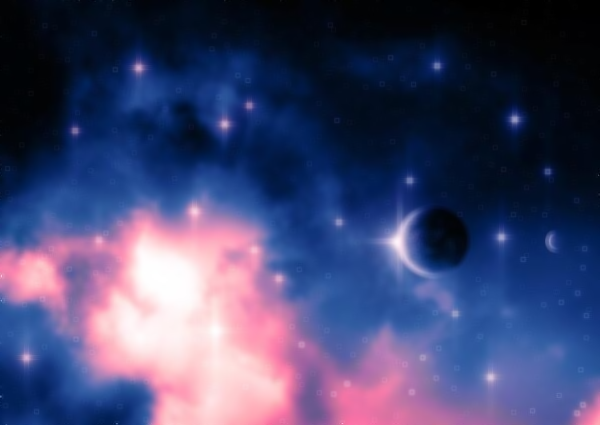

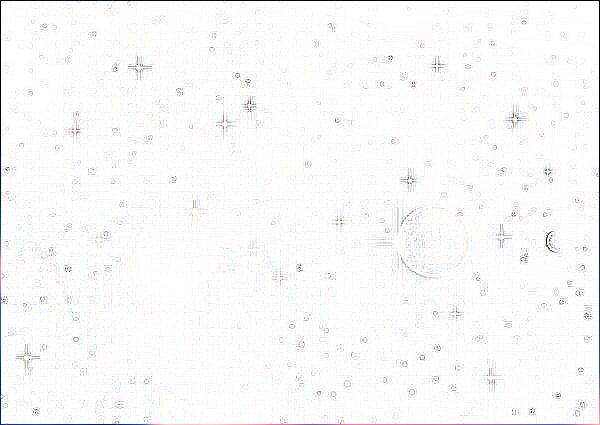

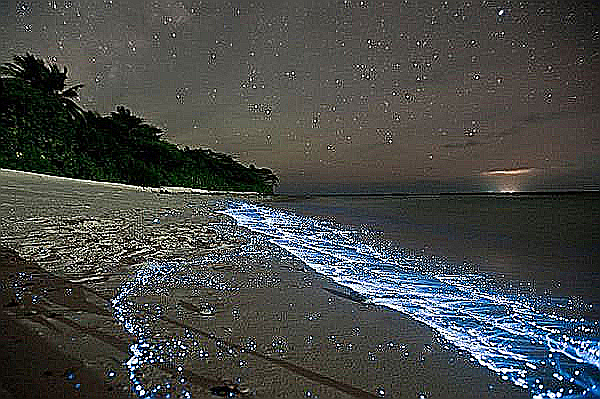

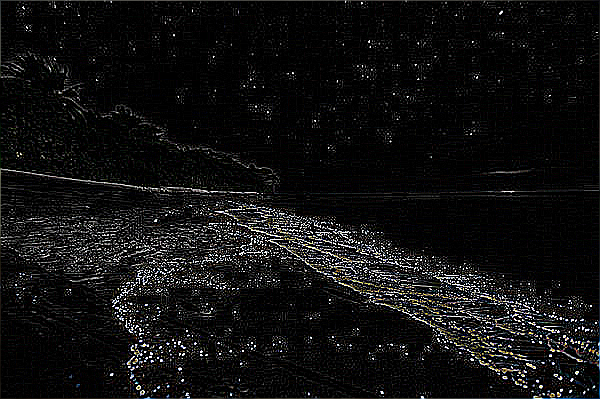

(600, 425)
(600, 399)


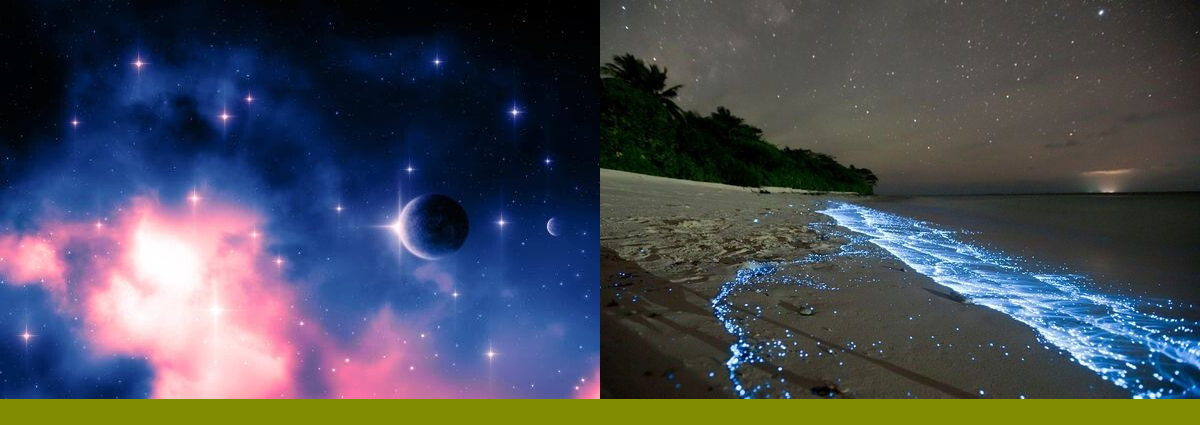

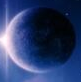

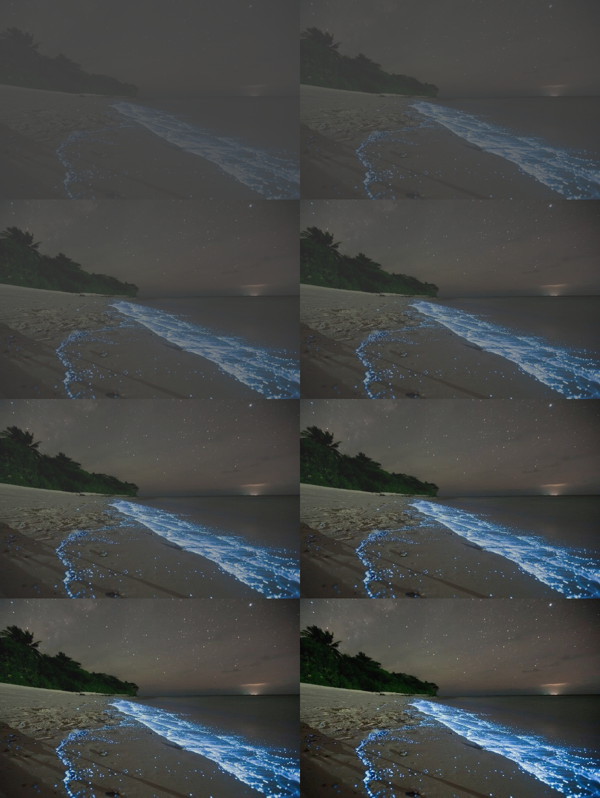

In [98]:
import PIL
from PIL import ImageEnhance
from PIL import ImageFont
from PIL import ImageDraw
from PIL import ImageFilter
from PIL import Image
from IPython.display import display
#Citirea celor 2 imagini
image1 = Image.open('univers.jpg')
image2 = Image.open('plaja.jpg')

#Afisare imagini
display(image1,image2)

#Salvare imagine ca png in loc de jpg
image1.save("univers.png")

#Rotire imagine la 83 de grade
rotire = image2.rotate(83)
display(rotire)

#Convertire in alt format
convert1=image1.convert('RGB') 
convert2=image2.convert('RGB')

#Filtru blur
blurat=image1.filter(PIL.ImageFilter.BLUR)
display(blurat)
#Filtru contour
contur=image1.filter(PIL.ImageFilter.CONTOUR)
display(contur)
#Filtru accentuare detalii si contrast
smoth=image2.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)
display(smoth)
#Filtru accentuare margini - contrast
edge=image2.filter(PIL.ImageFilter.FIND_EDGES)
display(edge)

#Combinare 2 poze
image1_size = image1.size
image2_size = image2.size
print(image1_size)
print(image2_size)
if image2_size<image1_size:
    image1 = image1.resize((image2_size[0], image2_size[1]))
else:
    image2 = image2.resize((image1_size[0], image1_size[1]))

#crearea imaginii finale
imagine_finala = Image.new('RGB',(2*image1_size[0], image1_size[1]), (130,140,3))
#adaugarea celor 2 imagini initiale
imagine_finala.paste(image1,(0,0))
imagine_finala.paste(image2,(image1_size[0],0))
display(imagine_finala)

#Decupare obiect
decupare = image1.crop((393,187,474,269))
display(decupare)

#incadrare=ImageDraw.Draw(image1)
#incadrare.rectangle((393,187,474,269), fill = None, outline ='green')
#image1.save("chenar_univers.jpg")

'''
draw = ImageDraw.Draw(image1)
draw2= ImageDraw.Draw(image2)
text = "Ionut-Adrian"
font = ImageFont.truetype("Aller_Rg.ttf", 7)

draw.text((323, 66),text, font=font,fill=(148,7,40))
draw2.text((323, 66),text, font=font,fill=(148,7,40))
image1.save("Prenume1.jpg")
image2.save("Prenume2.jpg")

'''
convert2=image2.convert('RGB')
enhancer = ImageEnhance.Contrast(convert2)
images = []
for i in range(1,9):
    images.append(enhancer.enhance(i/9))

first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*2,first_image.height*4))
x=0
y=0

# se parcurge lista cu cele 9 imagini de contraste diferite
for img in images:
    # se adauga imaginea curenta in foaia de contact
    contact_sheet.paste(img, (x, y) )
    # Se actualizeaza valoarea parametrilor x si y ce indica pozitia. 
    #Daca s-a atins latimea imaginii, se seteaza x la 0 si y la urmatoarea linie de inserat
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# se redimensioneaza foaia de contact si se afiseaza
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)



#Pasul 3





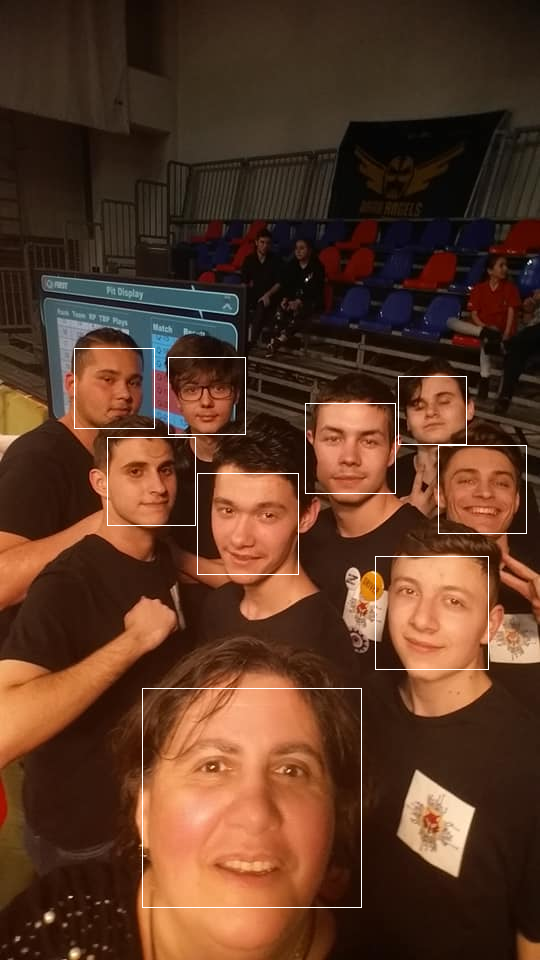

55.1 ms ± 4.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [142]:
import cv2 as cv
from PIL import Image
from PIL import ImageDraw


# se incarca imaginea robotica.jpg
img = cv.imread('robotica.jpg')
# se trasforma in imagine cu tonuri de gri utilizand metoda cvtColor cu parametru: COLOR_BGR2GRAY

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

imagine = Image.fromarray(gray,"L")
imagine.save("robotica_gri.jpg")

#Clasificatori
face_cascade = cv.CascadeClassifier('clasificatori/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('clasificatori/haarcascade_eye.xml')

#Returnare lista de obiecte - dreptunghi -- gray -> tablou ndarray al imaginii
img = cv.imread('robotica_gri.jpg')
faces = face_cascade.detectMultiScale(img)

poza = Image.open('robotica.jpg')
#Creare imagine pe care se deseneaza dreptunghiul
desenare = ImageDraw.Draw(poza)


faces = face_cascade.detectMultiScale(img,1.34)

# Desenam noul dreptunghi
for x,y,w,h in faces:
    desenare.rectangle((x,y,x+w,y+h), outline="white")
display(poza)

#Masurarea timpului de executie a functiei detectMultiScale()
%timeit face_cascade.detectMultiScale(img,1.34)
